In [2]:
import pandas as pd
import re

df = pd.read_csv(
    './data/Apartment_List_Rent_Estimates_2024_02.csv'
)
[col for col in df.columns if not col.startswith('20')]

['location_name',
 'location_type',
 'location_fips_code',
 'population',
 'state',
 'county',
 'metro',
 'bed_size']

<Axes: xlabel='month'>

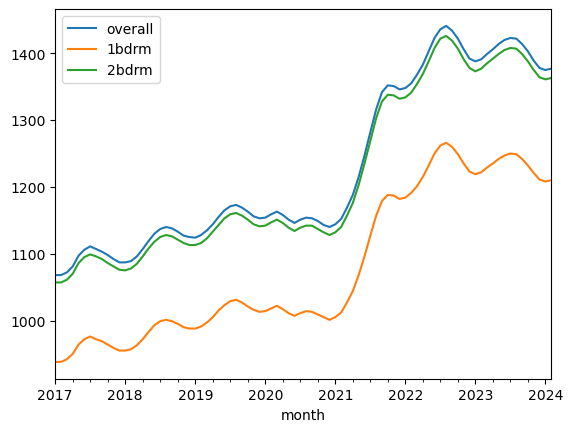

In [3]:
month_regex = re.compile(r'20\d\d_\d\d')
dates = [
    col for col in df.columns
    if re.fullmatch(month_regex, col)
]
columns =['bed_size'] + dates

nat_by_bedsize = (
    df.query('location_type == "National"')[columns].T.reset_index()
      .rename(columns={'index': 'month',
                       0: 'overall', 1: '1bdrm', 2: '2bdrm'})
      .iloc[1:, :]
)
def converter(x):
    return pd.to_datetime(f'{x[:4]}-{x[-2:]}')

nat_by_bedsize['month'] = nat_by_bedsize['month'].apply(converter)
nat_by_bedsize.set_index('month').plot()

In [4]:
columns1 = ['population'] + dates
by_counties = (
    df.query('location_type == "County" and bed_size == "overall"')
      .loc[:, columns1]
)
pop_quantile = df['population'].quantile([0.25, 0.75]).to_list()

by_counties['county_size'] = (
    df['population'].apply(
        lambda x: 'small' if x < pop_quantile[0] else 'medium'
        if x <= pop_quantile[1] else 'large'
    )
)
by_counties = (
    by_counties.drop('population', axis=1)
               .groupby('county_size').mean().T.reset_index()
               .rename(columns={'index': 'month'})
)
by_counties['month'] = (
    by_counties['month'].apply(converter)
)
by_counties = by_counties.set_index('month')
by_counties


county_size,large,medium,small
month,,,
2017-01-01,1288.623853,1033.032787,1112.666667
2017-02-01,1293.366972,1025.973118,1063.000000
2017-03-01,1301.522936,1032.166667,1125.142857
2017-04-01,1313.412844,1040.323077,1125.666667
2017-05-01,1328.500000,1048.974747,1136.833333
...,...,...,...
2023-10-01,1681.666667,1406.351351,1403.111111
2023-11-01,1666.090090,1395.896396,1393.111111
2023-12-01,1653.351351,1387.076577,1378.222222


<Axes: xlabel='month'>

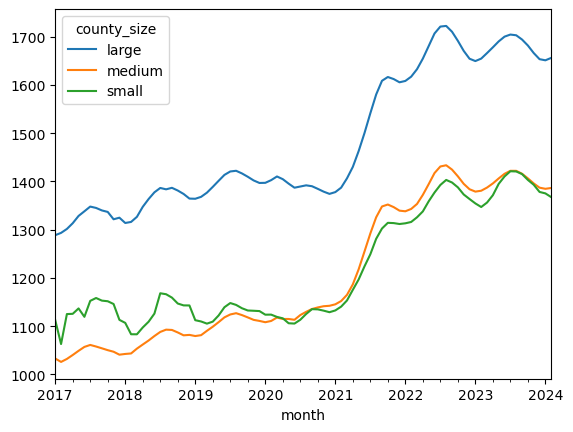

In [5]:
by_counties.plot()

In [6]:
columns2 = ['state', 'bed_size'] + dates
by_state = (
    df.query('location_type == "State" and bed_size == "overall"')
      .loc[:, columns2]
)
by_state

,state,bed_size,2017_01,2017_02,2017_03,2017_04,2017_05,2017_06,2017_07,2017_08,...,2023_05,2023_06,2023_07,2023_08,2023_09,2023_10,2023_11,2023_12,2024_01,2024_02
3,California,overall,1726.0,1729.0,1729.0,1741.0,1764.0,1783.0,1790.0,1793.0,...,2171,2174,2178,2177,2168,2153,2131,2110,2106,2112
6,Texas,overall,1048.0,1046.0,1046.0,1054.0,1065.0,1070.0,1072.0,1068.0,...,1331,1333,1334,1332,1324,1313,1298,1287,1282,1282
9,Florida,overall,1075.0,1078.0,1079.0,1084.0,1095.0,1104.0,1109.0,1109.0,...,1606,1603,1598,1591,1581,1570,1557,1547,1545,1548
12,New York,overall,1474.0,1483.0,1498.0,1516.0,1540.0,1551.0,1552.0,1548.0,...,1850,1882,1904,1908,1895,1874,1849,1826,1815,1818
21,Pennsylvania,overall,1013.0,1013.0,1020.0,1038.0,1070.0,1086.0,1087.0,1079.0,...,1269,1280,1281,1281,1274,1272,1263,1255,1251,1252
24,Illinois,overall,1060.0,1070.0,1079.0,1099.0,1117.0,1129.0,1131.0,1122.0,...,1372,1388,1395,1395,1387,1376,1364,1355,1353,1357
27,Ohio,overall,775.0,779.0,785.0,797.0,804.0,810.0,812.0,807.0,...,1068,1077,1086,1081,1074,1066,1063,1060,1059,1060
30,Georgia,overall,996.0,999.0,1006.0,1013.0,1027.0,1037.0,1041.0,1037.0,...,1379,1380,1380,1375,1363,1350,1334,1322,1315,1319
33,North Carolina,overall,907.0,905.0,916.0,923.0,934.0,932.0,936.0,932.0,...,1271,1279,1281,1277,1268,1256,1242,1230,1224,1223
36,Michigan,overall,830.0,832.0,839.0,845.0,854.0,866.0,877.0,882.0,...,1111,1124,1131,1131,1125,1114,1106,1099,1101,1104


In [7]:
(by_state.set_index('state').loc[:, '2024_02']
 .sort_values(ascending=False))

state
Hawaii                  2243
District of Columbia    2113
California              2112
Massachusetts           1909
New Jersey              1870
New York                1818
Maryland                1773
Washington              1705
Virginia                1671
Colorado                1656
Connecticut             1588
Florida                 1548
Alaska                  1531
New Hampshire           1483
Delaware                1443
Oregon                  1442
Nevada                  1441
Rhode Island            1382
Arizona                 1374
Utah                    1364
Illinois                1357
Georgia                 1319
Minnesota               1282
Texas                   1282
Pennsylvania            1252
South Carolina          1233
North Carolina          1223
Tennessee               1159
Wisconsin               1158
Nebraska                1106
Michigan                1104
Missouri                1086
Idaho                   1083
Indiana                 1080
North Da

In [8]:
df['location_type'].drop_duplicates()

0     National
3        State
15       Metro
39      County
51        City
Name: location_type, dtype: object

In [19]:
(
    df.query('location_type == "Metro" and bed_size == "overall"')
      .loc[:, ['location_name', '2024_01', '2024_02']].set_index('location_name')
      .T.pct_change().iloc[1:, :].T.rename(columns={'2024_02': 'pct_change'})
      .sort_values(by='pct_change')
)

,pct_change
location_name,
"Rock Springs, WY",-0.025615
"Bremerton-Silverdale-Port Orchard, WA",-0.019466
"Mobile, AL",-0.015733
"San Angelo, TX",-0.015679
"Santa Maria-Santa Barbara, CA",-0.015656
...,...
"Pittsburgh, PA",0.014023
"Bend, OR",0.014206
"Grand Rapids-Kentwood, MI",0.016129


In [20]:
(
    df.query('location_type == "Metro" and bed_size == "overall"')
      .loc[:, ['location_name', '2024_01', '2024_02']].set_index('location_name')
      .T.pct_change().iloc[1:, :].T.rename(columns={'2024_02': 'pct_change'})
      .query('pct_change > 0.0').sort_values(by='pct_change')
)

,pct_change
location_name,
"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",0.000660
"Phoenix-Mesa-Chandler, AZ",0.000695
"Deltona-Daytona Beach-Ormond Beach, FL",0.000702
"Providence-Warwick, RI-MA",0.000737
"Wilmington, NC",0.000789
...,...
"Pittsburgh, PA",0.014023
"Bend, OR",0.014206
"Grand Rapids-Kentwood, MI",0.016129
